## Importing packages

In [261]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
from skimage.io import imread
from skimage.color import rgb2lab, lab2rgb
from PIL import Image
from keras.preprocessing.image import  img_to_array, load_img
from sklearn.model_selection import train_test_split

In [262]:
NUM_OF_IMAGES=10

## Preparing the dataset
    1.We load our images from the given directory
    2.We convert our images to numpy arrays


In [263]:
# dataset directory
direc='C:/Users/2019/Desktop/Studying/Machine Learning/Image_recolorizer/tiny-imagenet-200/train/n01443537/images2' 

# counter to limit the amount of images we read
counter=0

img_arr2=[]
img_arr=[]

for x in os.listdir(direc):
    # we only read the first 'counter' amount of Jpegs
    if x.endswith('.JPEG') and counter<10:      
        counter+=1
        # Generating the corrosponsing path to the picture
        path=direc+'/'+x
        target_size=(64,64)
        # loading images from the path
        img_arr.append(load_img(path,target_size=target_size))
        
# Converting all the pictures to numpy arrays       
for x in img_arr:
    #print(img_to_array(x).shape)
    img_arr2.append(img_to_array(x))          
img_arr2=np.array(img_arr2)
# print(img_arr2.shape)

### Side Functions:
    1.We define plotChannels function to assist in plotting the bounds/ranges of each of the channel types
    2.We define L_extract to extract the different channels from an image's LAB version

In [264]:
def plotChannels(img_arr2,labels=['r','g','b']):
    #going over each label and calculating max/min values
    for x,y in enumerate(labels):
        mi=np.min(img_arr2[:,:,:,x])
        ma=np.max(img_arr2[:,:,:,x])
        print('{}: min={:8.4f}, max={:8.4f}'.format(y,mi,ma))

plotChannels(img_arr2,labels=['r','g','b'])

r: min=  0.0000, max=255.0000
g: min=  0.0000, max=255.0000
b: min=  0.0000, max=255.0000


In [282]:
def L_extract(img,x):
    y=np.zeros(img.shape)
    # we return the given channel of LAB in rgb and adjust the brightness only on A and B
    if x != 0:
        y[:,:,0]=60
    y[:,:,x]=img[:,:,x]
    #convert back to rgb to plot
    y=lab2rgb(y)
    return y

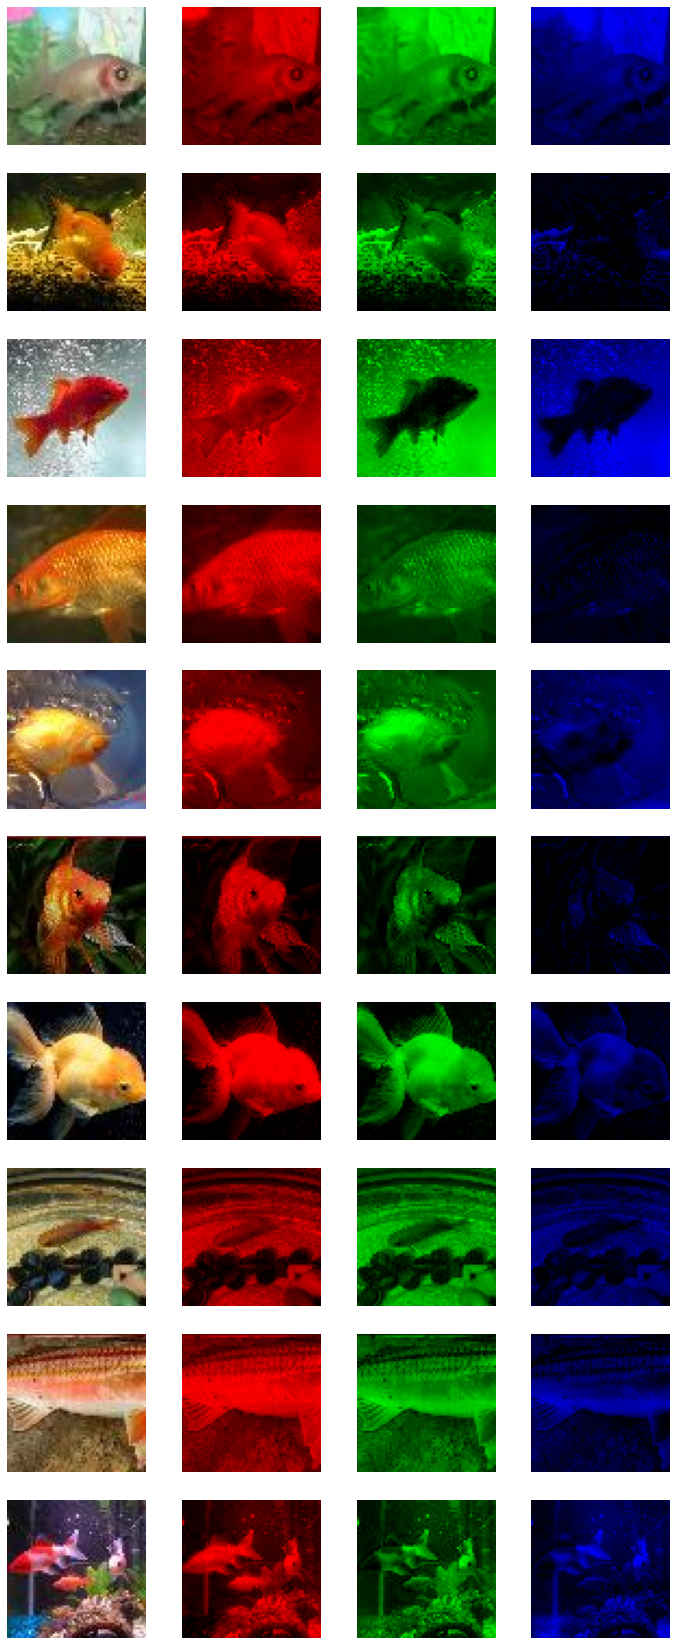

In [266]:
count=1
plut=plt.figure(figsize=(12,3*img_arr2.shape[0]))
for channel in img_arr2:
    #adding the subplot for the original picture
    x=plut.add_subplot(img_arr2.shape[0],4,count)
    x.imshow(channel/255.0); x.axis('off')
    count+=1
    
    for x,y in enumerate(['r','g','b']):
        #adding the subplot for each channel for the original picture
        x2=np.zeros(channel.shape)
        #we set each channel excluding the one we want to 0
        x2[:,:,x]=channel[:,:,x]
        x=plut.add_subplot(img_arr2.shape[0],4,count)
        x.imshow(x2/255.0); x.axis('off')
        count+=1
    

## Converting RGB to LAB

In [267]:
img_arr3=img_arr2/255.0
plotChannels(img_arr3,['r','g','b'])
img_arr_lab=rgb2lab(img_arr3)
plotChannels(img_arr_lab,['l','a','b'])

r: min=  0.0000, max=  1.0000
g: min=  0.0000, max=  1.0000
b: min=  0.0000, max=  1.0000
l: min=  0.0000, max= 99.7812
a: min=-43.0250, max= 74.6905
b: min=-55.7463, max= 78.8553


In [268]:
img_lab_rgb=np.zeros(img_arr_lab.shape)
img_lab_rgb=lab2rgb(img_arr_lab)
plotChannels(img_lab_rgb.reshape((1,)+img_lab_rgb.shape),['r','g','b'])

r: min=  0.0000, max=  1.0000
g: min=  0.0000, max=  1.0000
b: min=  0.0000, max=  1.0000


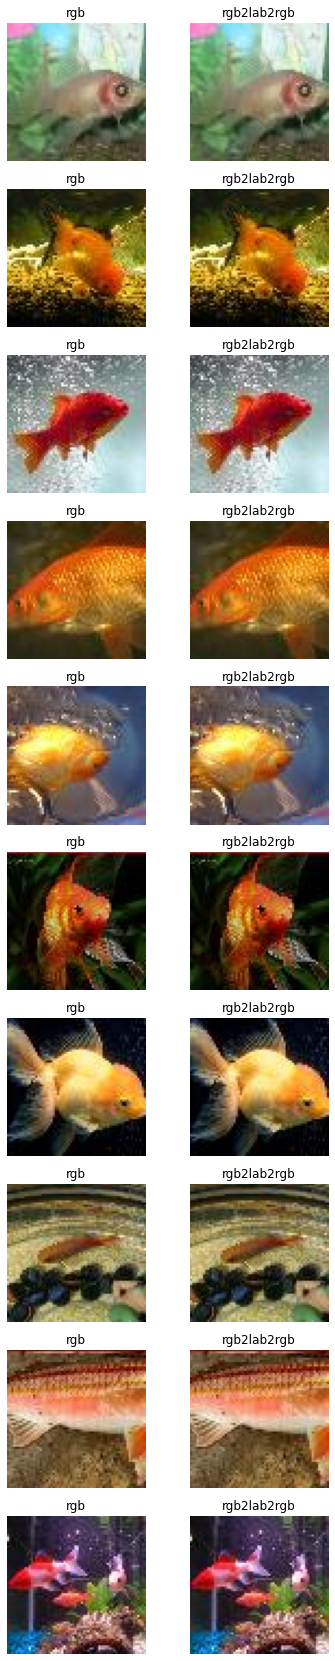

In [269]:
count=1
fig=plt.figure(figsize=(6,3*img_arr2.shape[0]))
#we enumerate over our original images and images after double conversion to compare the loss
for irgb,irgb2 in zip(img_arr3,img_lab_rgb):
    #original
    x=fig.add_subplot(img_arr2.shape[0],2,count)
    x.imshow(irgb); x.axis('off')
    x.set_title('rgb')
    count+=1
    #doubly converted
    x=fig.add_subplot(img_arr2.shape[0],2,count)
    x.imshow(irgb2); x.axis('off')
    x.set_title('rgb2lab2rgb')
    count+=1
    
plt.show()
    

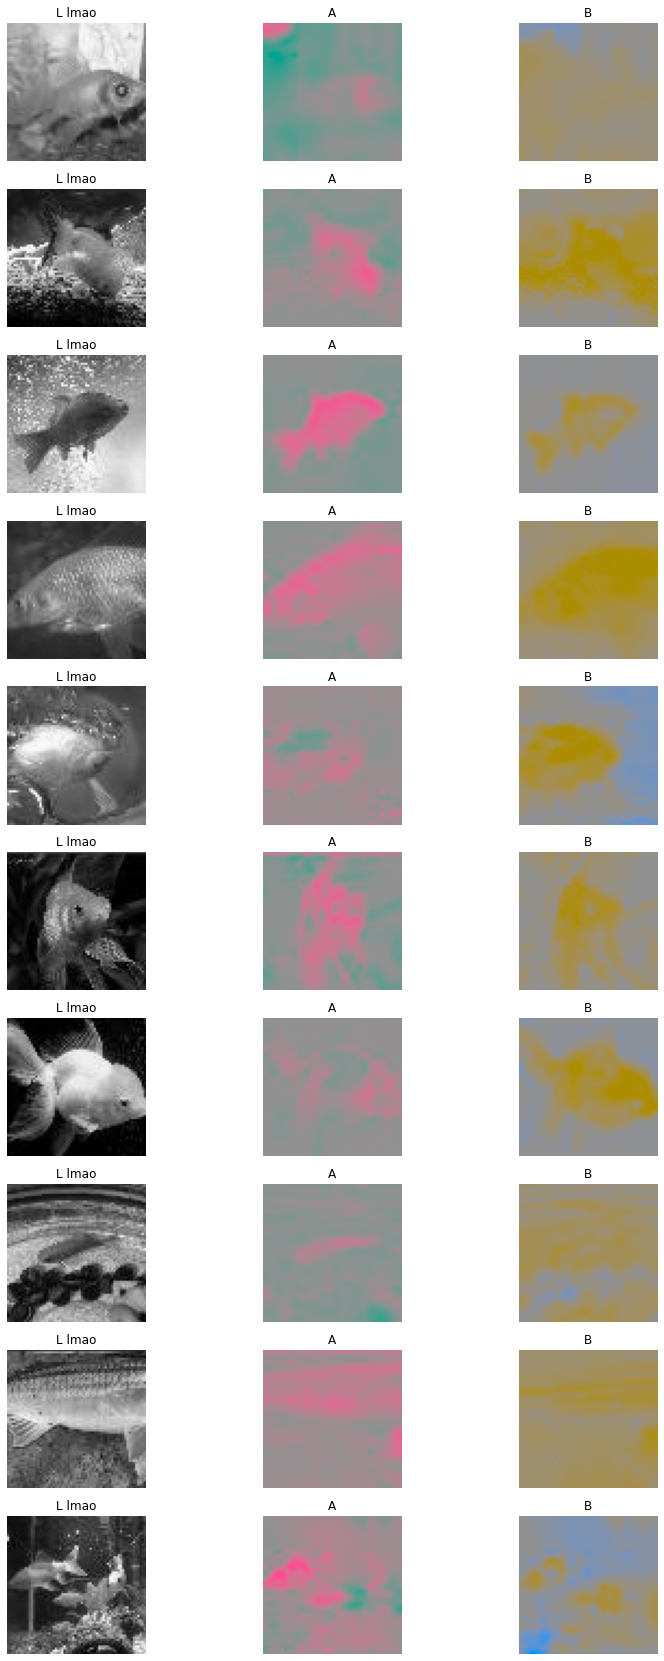

In [270]:
count=1
fig=plt.figure(figsize=(13,3*img_arr2.shape[0]))
#we plot the three channels of the LAB versions of our images
for img in img_arr_lab:
    #L
    x=fig.add_subplot(img_arr2.shape[0],3,count)
    lab_rgb_gray=L_extract(img,0)
    x.imshow(lab_rgb_gray) ; x.axis('off')
    x.set_title('L lmao')
    count+=1
    #A
    x=fig.add_subplot(img_arr2.shape[0],3,count)
    lab_rgb_gray=L_extract(img,1)
    x.imshow(lab_rgb_gray) ; x.axis('off')
    x.set_title('A')
    count+=1
    #B
    x=fig.add_subplot(img_arr2.shape[0],3,count)
    lab_rgb_gray=L_extract(img,2)
    x.imshow(lab_rgb_gray) ; x.axis('off')
    x.set_title('B')
    count+=1

plt.show()

In [293]:
L_array=[]
A_array=[]
B_array=[]
for img in img_arr_lab:
    L_array.append(L_extract(img,0))
    A_array.append(L_extract(img,1))
    B_array.append(L_extract(img,2))
    
y=np.hstack((A_array,B_array)).reshape(NUM_OF_IMAGES,2,64,64,3)
x=L_array
#LAB_arr=np.hsplit(LAB_arr, [64, 64])
print(LAB_arr.shape)
# fig=plt.figure(figsize=(13,3*img_arr2.shape[0]))
# count=1
# counter=0
# for img in LAB_arr:
#     x=fig.add_subplot(img_arr2.shape[0],3,count)
#     x.imshow(LAB_arr[counter][0]) ; x.axis('off')
#     x.set_title('Lmao')
#     count+=1
    
#     x=fig.add_subplot(img_arr2.shape[0],3,count)
#     x.imshow(LAB_arr[counter][1]) ; x.axis('off')
#     x.set_title('A')
#     count+=1
    
#     x=fig.add_subplot(img_arr2.shape[0],3,count)
#     x.imshow(LAB_arr[counter][2]) ; x.axis('off')
#     x.set_title('B')
#     count+=1
    
#     counter+=1
L_array=np.array(L_array)
B_array=np.array(B_array)
A_array=np.array(A_array)
B_array[:,:,:,2]


(10, 3, 64, 64, 3)


array([[[0.62951982, 0.62210108, 0.63843668, ..., 0.58211786,
         0.58747367, 0.58739739],
        [0.63460876, 0.63232856, 0.6435737 , ..., 0.5833413 ,
         0.58092551, 0.58029515],
        [0.67654962, 0.67089177, 0.66626781, ..., 0.57670402,
         0.57430464, 0.57244377],
        ...,
        [0.39591658, 0.40583344, 0.41053938, ..., 0.48153216,
         0.48006257, 0.48323457],
        [0.39535328, 0.40484074, 0.4095611 , ..., 0.48173115,
         0.47984091, 0.48192751],
        [0.39586556, 0.40345162, 0.41053938, ..., 0.48358765,
         0.47984091, 0.47868405]],

       [[0.47666235, 0.47865378, 0.4895652 , ..., 0.43685733,
         0.43113652, 0.43141771],
        [0.4745676 , 0.47924132, 0.4895652 , ..., 0.43757881,
         0.43524687, 0.43133153],
        [0.47962073, 0.48219325, 0.5007661 , ..., 0.43636471,
         0.43499737, 0.43498172],
        ...,
        [0.56297651, 0.56039173, 0.55717745, ..., 0.38803951,
         0.47832723, 0.42237835],
        [0.5

In [272]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [273]:
batch_size=128
epochs=10
input_shape=(64,64,1)